In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
df=pd.read_csv("House_price_Dataset.csv",sep=",")

In [4]:
df.shape

(1460, 81)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Cleaning

In [7]:
#checking percentage of missing values for each column

df.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

- For Some categorical variables <b>"NA" is a valid category</b>.
- So for those categorical variables we will<b> impute Null values as NA</b>

In [8]:
#Converting Value NA of categorical Columns into None as they are not null values it is Type of Category

columns=["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
      "FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]
for col in columns:
    df[col].fillna('NA',inplace=True)

 - Will change the category to object of OverallCond and OverallQual variables as they are categorical variables

In [9]:
df["OverallCond"]=df["OverallCond"].astype("object")
df["OverallQual"]=df["OverallQual"].astype("object")

- Impute Missing Values for Continuous variable<b>  LotFrontage with Median()</b>
- LotFrontage is having 17% of Null Values We will impute them Using Median as Median is best repesentative value

In [10]:
df["LotFrontage"].fillna(df["LotFrontage"].median(),inplace=True)

In [11]:
# Remove Duplocate Rows if any
df.drop_duplicates(inplace=True)

# Drop Id Column from dataset as it is just unique value
df.drop("Id",axis=1,inplace=True)

- For Masonry veneer type (<b>MasVnrType </b>) there are 0.05% of Missing values
- Also for this Missing values <b>MasVnrArea</b> variable also have missing values 0.5% as Bothe variables are related
- if we drop this null values we will loss total <b>0.05%</b> of data only. Which is very less
- So we will drop this null values

In [12]:
#MasVnrType is having 0.05%(8 values out of all) of Null values only
#and For this null values MasVnrArea values are also Null so we will drop this null values

df.dropna(subset=['MasVnrType','MasVnrArea'],inplace=True)

In [13]:
#Electrical is having very less 0.06% of Null values as it is very less we will drop
df.dropna(subset=['Electrical'],inplace=True)

- <b> GarageYrBlt</b> is having 5.5% of Null values
- This is because we have <b>GarageType</b> variable having None value 5.5% 
- As GarageYr Blt is null because GarageType is None
- we will <b>impute this with "-1" </b>as Garage Type is None it will be not having year build

In [14]:
df["GarageYrBlt"].fillna(-1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   Alley          1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   object 
 17  OverallCond    1451 non-null   object 
 18  YearBuil

In [16]:
#function to display bar values
def displayBarValues(chartName,ty=""):
    for p in chartName.patches:
        bar_height = p.get_height() if not pd.isnull(p.get_height()) else 0
        bar_width = p.get_width() if not pd.isnull(p.get_width()) else 0
        bar_x = p.get_x() if not pd.isnull(p.get_x()) else 0
        if(ty=="per"):
            chartName.text(bar_x + (bar_width / 2.0),
                bar_height +0.9,(str)(round(bar_height,1))+"%" or '', color='black', ha="center")
        else:
            chartName.text(bar_x + (bar_width / 2.0),
                bar_height +0.9,(round(bar_height,1)) or '', color='black', ha="center")
       # hideLinesForBar(chartName)
        
def hideLinesForBar(chartname):
    chartname.spines['top'].set_visible(False)
    chartname.spines['right'].set_visible(False)

def displayPieChartValues(chartname):
    chartname.legend(wedges, PerData.funding_round_type,
          title="Funding Types",
          loc="upper left",
          bbox_to_anchor=(0.8, 0, 0.3, 1))
    plt.setp(autotexts, size=8, weight="bold",color='w')

## Derived Coolumns

- As we have columns having Year, We will create New column for our analysis
- And will drop existing columns

In [17]:
# Age of House when it was sold
df['Age_YrSold'] = df["YrSold"]-df["YearBuilt"]
#Age of House as of Today
df['Age_YearBuilt'] = pd.datetime.now().year - df['YearBuilt']
#Total Years As of Today after renovation
df['Age_YearRemodAdd'] = pd.datetime.now().year - df['YearRemodAdd']
#Age of Garage from time it is build till Today
df['Age_GarageYrBlt'] = pd.datetime.now().year - df['GarageYrBlt']

In [18]:
# Drop existing columns
# Also we will not use Month when house was sold column for our analysis as now we are considering new derived variables

df.drop(["YearBuilt","YrSold","YearRemodAdd","GarageYrBlt","MoSold"],axis=1,inplace=True)

In [19]:
df.shape

(1451, 79)

## Distribution of each level of  sub category for categorical variables

- Now we will check the % of values for all levels of categories for categorical columns
- if any categorical columns have only one value with 90% or more than that then, we will drop those column.
- As this columns with majority of 1 value will not be much helpful for our analysis

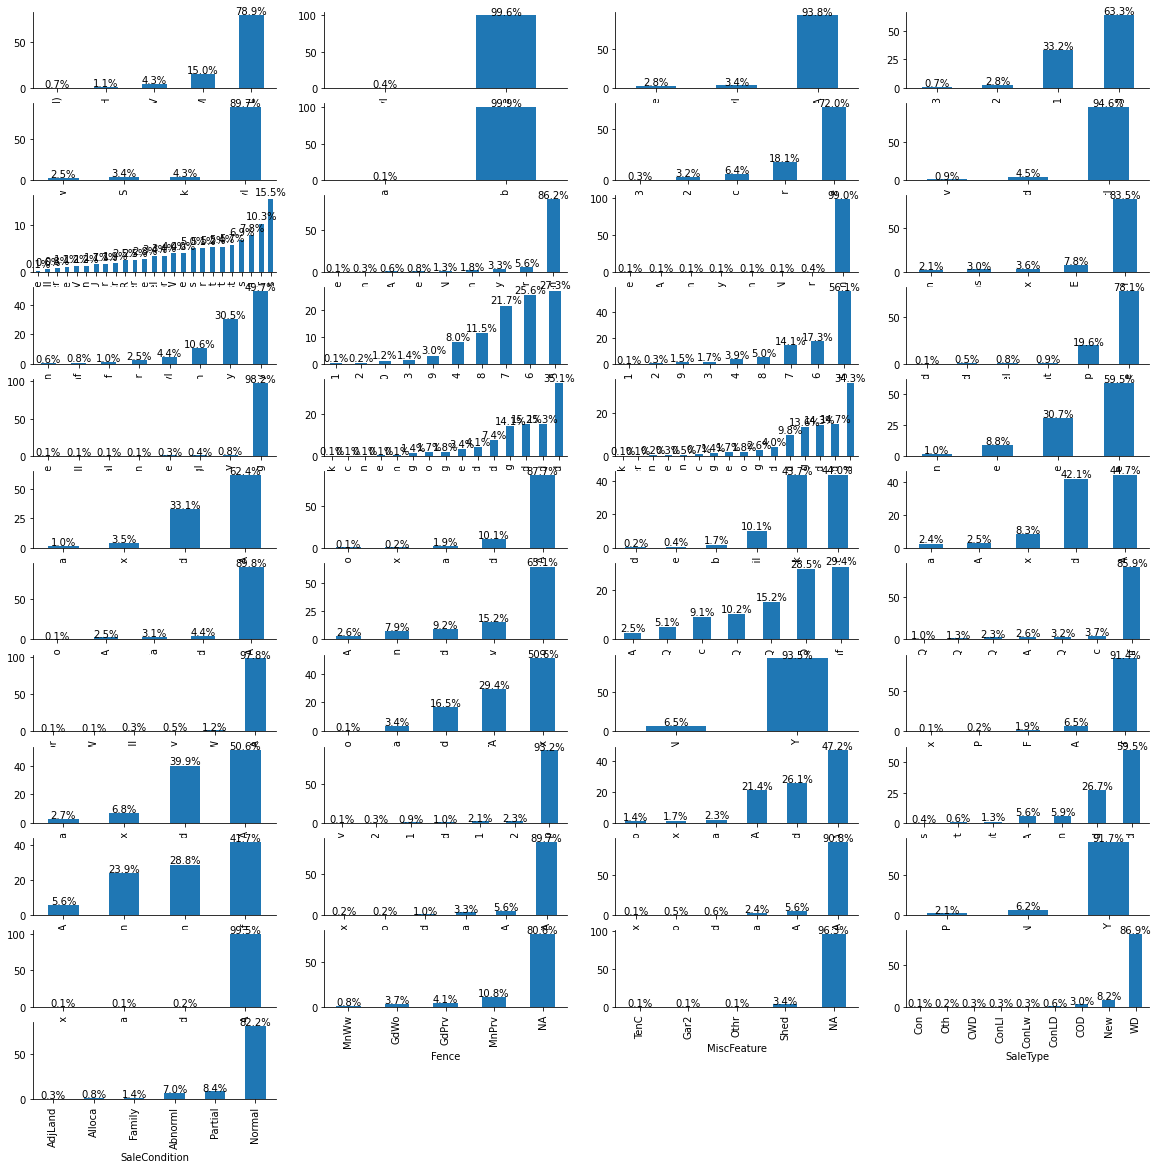

In [20]:
#Find all categorical columns
Categoricalcol=df.select_dtypes(include=["object"]).columns.tolist()

# bar chart for percentages of each sub category
plt.figure(figsize=(20,20))
for i,col in enumerate(Categoricalcol):
    plt.subplot(12,4,i+1)
    chart=(df[col].value_counts(normalize=True)*100).sort_values().plot(kind = 'bar')
    displayBarValues(chart,"per")
    hideLinesForBar(chart)
    plt.xlabel(col)
plt.show()

-<b>Obeservations : </b>
- From above graphs we can see that variables like "CentralAir","Heating","RoofMatl" etc have only one category having 90% or more values
- So, we will delete this variables ,as they have majority of one value they will not be useful for our analysis.
- And our model will not be able to learn anything from such variables having 90%or more similar values

In [21]:
#based on distribution columns to drop
drop_col=["Alley","GarageCond","PoolQC","MiscFeature","BsmtCond","GarageQual","Street",
         "LandSlope","PavedDrive","Functional","CentralAir","Heating","RoofMatl","Utilities","Condition2"]

df.drop(drop_col,axis=1,inplace=True)

 - For <b> BsmtFinType2</b> variable we have 86% of one category and for other categories we have less than 5% of values (GLQ:1%,ALQ:1.3,BLQ: 2.3,NA:2.6,LWQ:3.2,REC:3.7)
 - so we will group These categories as single category value named "OTHER"

In [22]:
def changeCatVal(val):
    catValues=["GLQ","ALQ","BLQ","NA","LwQ","Rec"]
    if val in catValues:
        return "OTHER"
    else:
        return val
df["BsmtFinType2"]=df["BsmtFinType2"].apply(lambda x:changeCatVal(x) )

- Also for <b>FireplaceQu</b> categories like Ex,Po,Fa have value percentage very low 1.4%,1.6%,2.3% respectively
- So we will convert this category to One Category as "OTHER"

In [23]:
df["FireplaceQu"]=df["FireplaceQu"].apply(lambda x : "OTHER" if x=="Fa"or x=="Ex" or x=="Po" else x )

# EDA


In [24]:
#Numerical Variables
numericalcol=df.select_dtypes(include=np.number).columns.tolist()
numCol_df=df[numericalcol]
numCol_df.shape

(1451, 34)

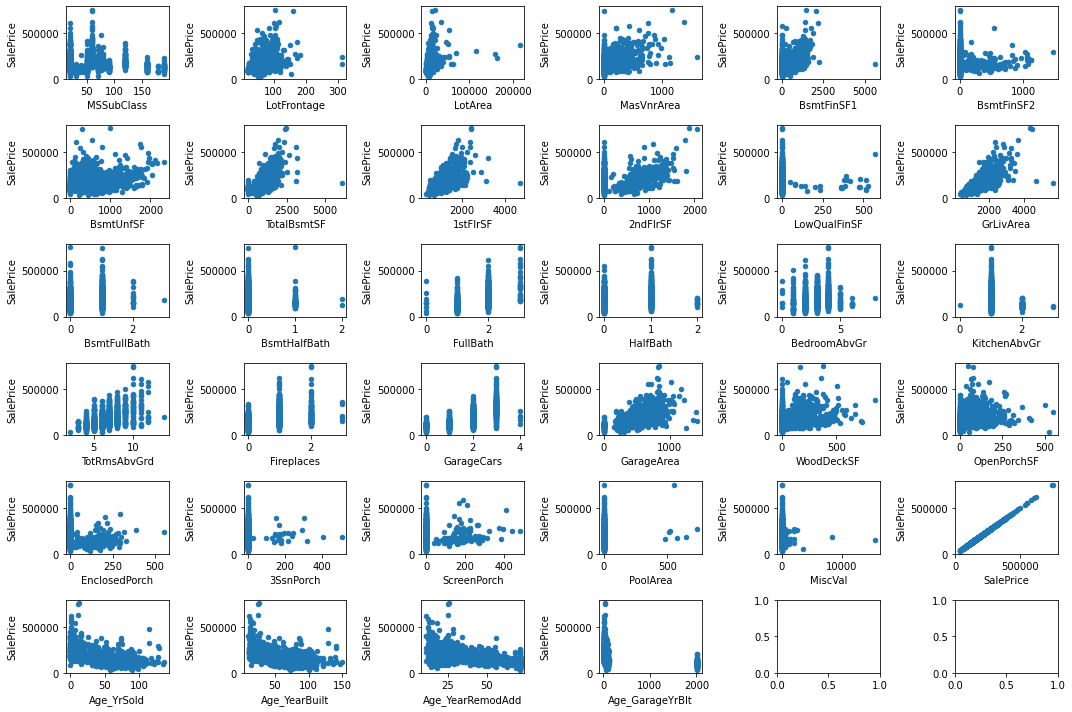

In [25]:
#charts
fig, axes = plt.subplots(6, 6, figsize=(15,10))
for idx, feature in enumerate(numCol_df.columns):
    numCol_df.plot(feature, "SalePrice", subplots=True, kind="scatter",ax=axes[idx // 6,idx % 6])
fig.tight_layout()
plt.show()

- <b>Observations-</b>
    - TotalBsmt,GrLivArea,1stFlrSF,LotFrontage have positive Linear relationship with dependant variable
    - Agr_yearBuilt and Age_yr sold, age of housing since renovation is done is having negative correlationship with Dependant variable
    - So we can use Linear Regression for our model building
    

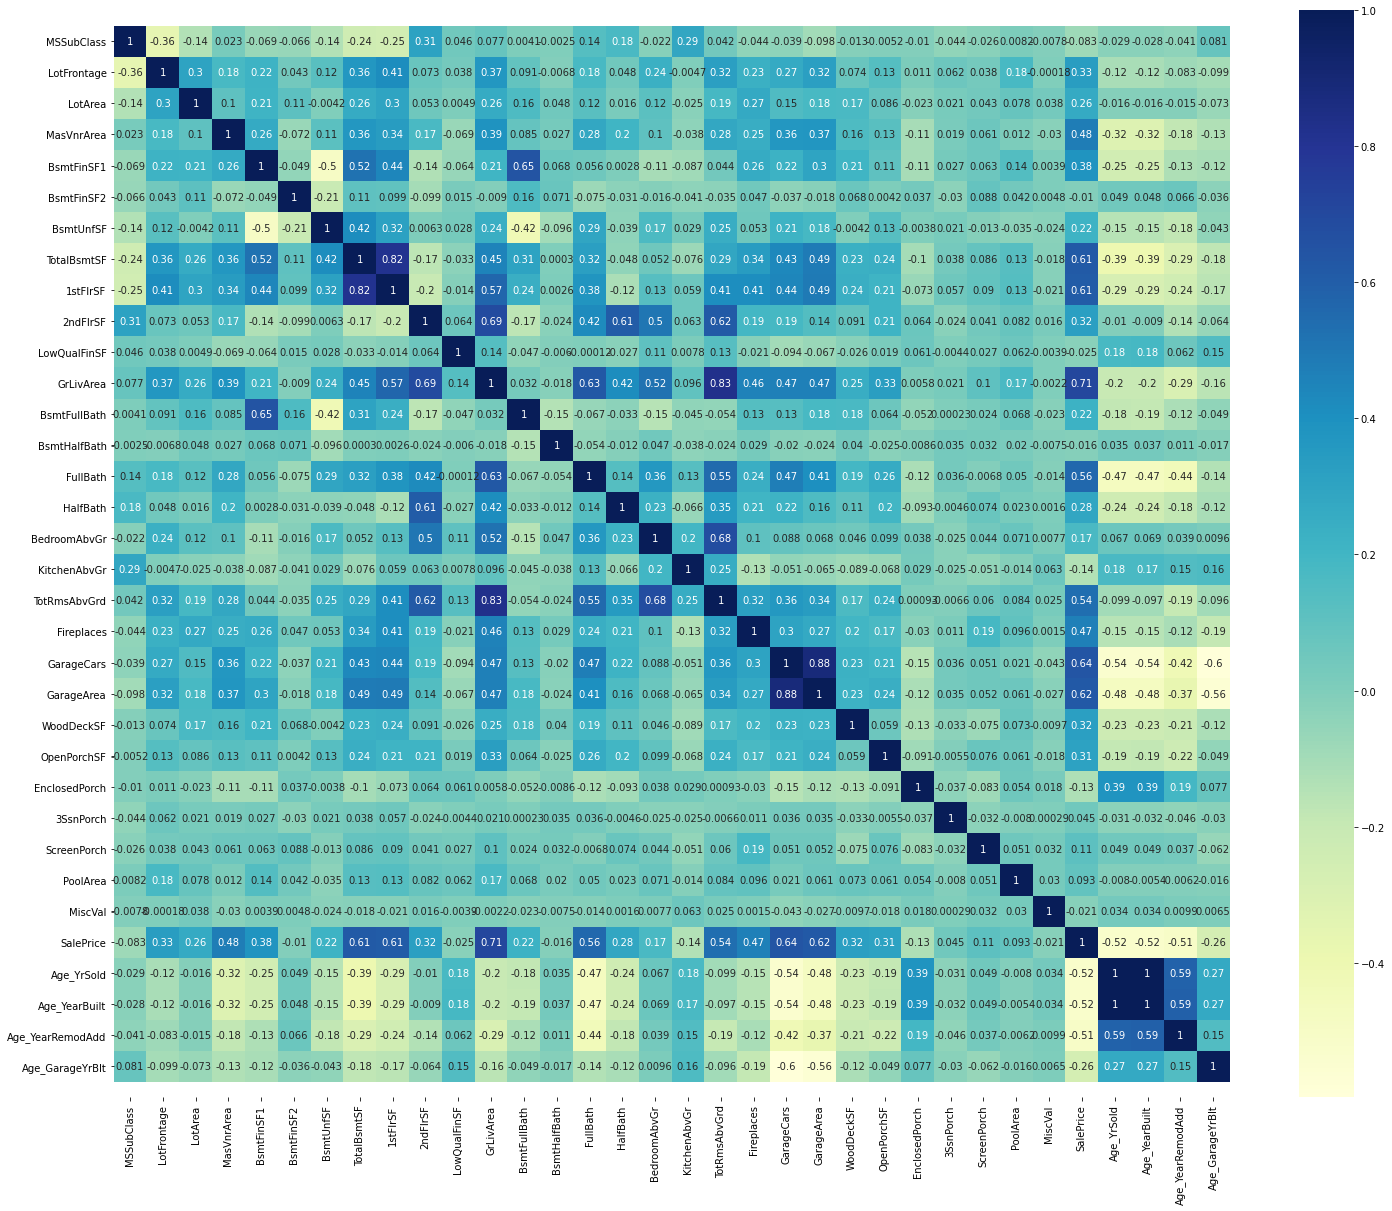

In [26]:
#Check for the correlation between variables

plt.figure(figsize=(25,20))
corre=df.corr()
ax=sns.heatmap(corre,annot=True,cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 
plt.show()

- <b>Observations-</b>
    - GarageCars & GarageArea are strongly correlated with each other 88%
    - TotalBsmtSF & 1stFlrSF are also correlated strongly correlated with each other 82%
    - So we will drop one of the two correlated variables
    - SOme variables have Very weak relationship with dependant variable.We will drop these features at the time of feature selection
    - We will have to check for Multicollinearity while building model
    

In [27]:
#Remove one of the highly correlated variables
df.drop(["GarageCars","1stFlrSF"],axis=1,inplace=True)

In [28]:
#List of Numerical Variables for later use
numericalcol=df.select_dtypes(include=np.number).columns.tolist()

### Categorical Variable Analysis

In [29]:
#List of all categorical variables

Categoricalcol=df.select_dtypes(include=["object"]).columns.tolist()
catCol_df=df[Categoricalcol]
catCol_df.shape

(1451, 30)

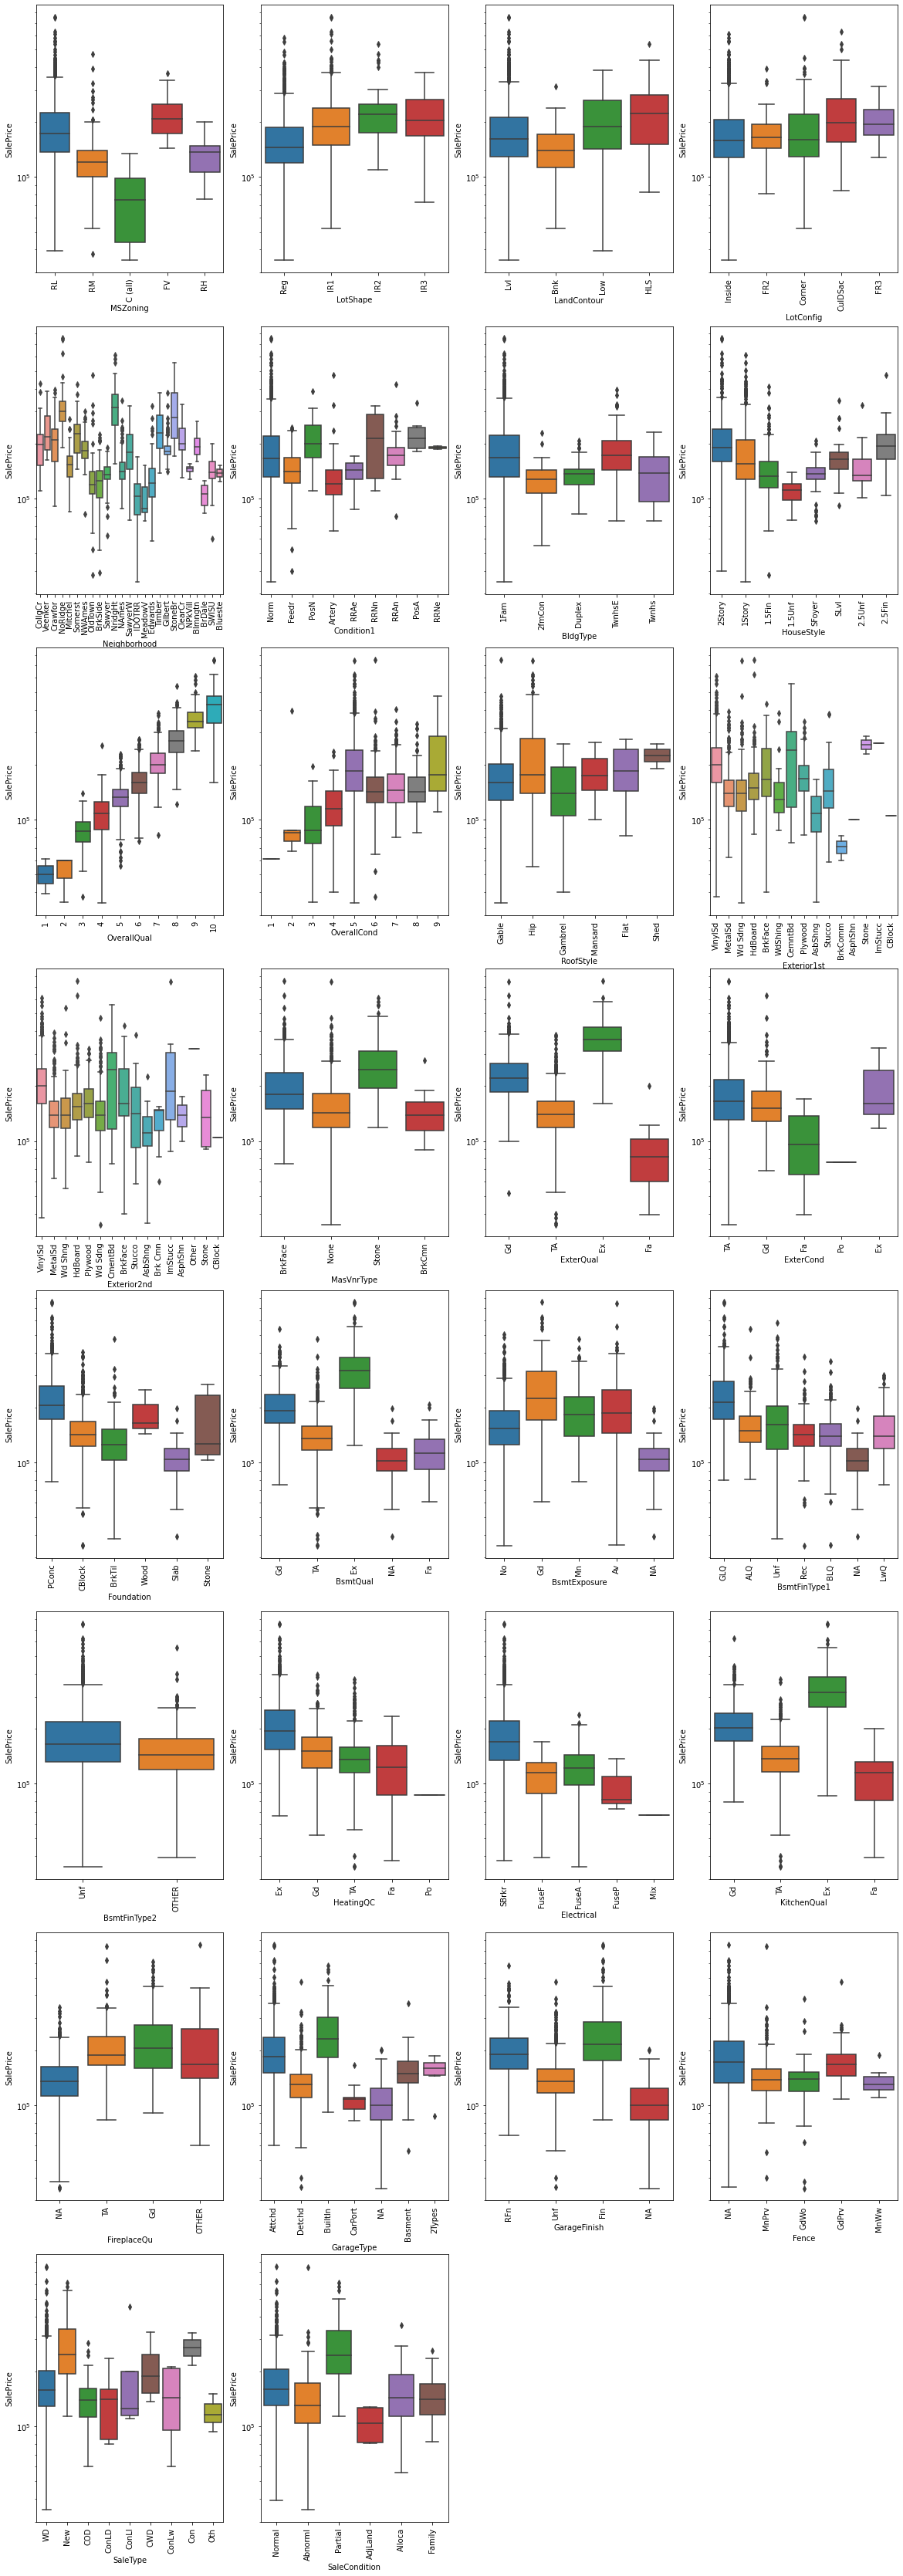

In [30]:
#Box plot for all categorical variables
plt.figure(figsize=(20,60))
for i,feature in enumerate(catCol_df.columns):
    plt.subplot(8,4,i+1)
    sns.boxplot(x=feature,y= df["SalePrice"],data=df)
    plt.yscale('log')
    plt.xticks(rotation=90)

fig.tight_layout()
plt.show()

-<b>Observations-</b>
    - Housing Sales price is High for houses having Pave type of Street
    - Majority of Houses do not have Alley access Also there are many outliers in terms of sales price for such houses
    - Prices have effect of LotShape values

## Checking distribution of Dependant Variable and Transforming it

- We can see data is right skewed.
- So we will do the log transformation To make data in normal distribution.

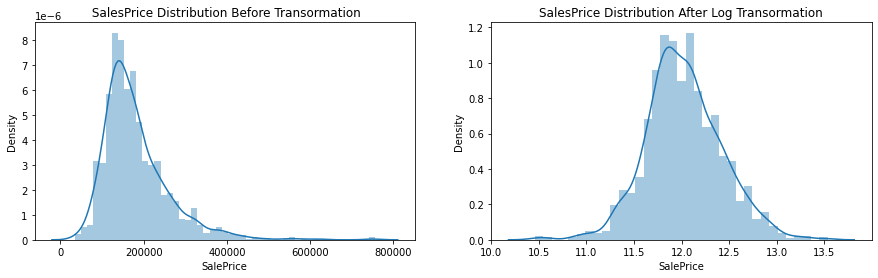

In [31]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(df.SalePrice)
plt.title(" SalesPrice Distribution Before Transormation")

# Transforming Target Variable to remove right skewness

df["SalePrice"]=np.log(df["SalePrice"])

plt.subplot(1,2,2)
sns.distplot(df.SalePrice)
plt.title("SalesPrice Distribution After Log Transormation")

plt.show()

# Dummies for categorical variables

- OverallQual and OverallCond are two o categorical variables having numeric values.So we will not create dummy of this variables
- For categories having only 2 levels we will map 0 and 1 as values 
- For categories having many levels we will use get_dummies() to create dummy variables

In [32]:
# Map 0 and 1 for categories having only 2 levels

df["BsmtFinType2"]=df["BsmtFinType2"].apply(lambda x: 1 if x=="Unf" else 0)

- GarageFinish also have category NA which is having exactly same count as GarageType=NA category
- So instead of Drop=First while creating dummies we will Drop NA category for these variables as it is already covered in GarageType category


In [33]:
GarageType_dummy= pd.get_dummies(df["GarageType"],drop_first=True,prefix="GarType")
#concat df
df=pd.concat([GarageType_dummy,df],axis=1)

#GarageFinish
GarageFinish_dummy= pd.get_dummies(df["GarageFinish"],prefix="GarageFinish")
GarageFinish_dummy.drop(["GarageFinish_NA"],inplace=True,axis=1)
df=pd.concat([GarageFinish_dummy,df],axis=1)

# Drop Original variables
df.drop(["GarageType","GarageFinish"],axis=1,inplace=True)

- BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1
- For all this variables,we will keep NA value while creating one category dummy and will drop for rest 
- as they have same no of observations for NA and are dependent

In [34]:
# BsmtQual
BsmtQual_dummy= pd.get_dummies(df["BsmtQual"],prefix="BsmtQual",drop_first=True)
df=pd.concat([BsmtQual_dummy,df],axis=1)

#BsmtExposure
BsmtExposure_dummy= pd.get_dummies(df["BsmtExposure"],prefix="BsmtExposure")
BsmtExposure_dummy.drop(["BsmtExposure_NA"],inplace=True,axis=1)
df=pd.concat([BsmtExposure_dummy,df],axis=1)

#BsmtFinType1
BsmtFinType1_dummy= pd.get_dummies(df["BsmtFinType1"],prefix="BsmtFinType1")
BsmtFinType1_dummy.drop(["BsmtFinType1_NA"],inplace=True,axis=1)
df=pd.concat([BsmtFinType1_dummy,df],axis=1)

#DROP ORIGINAL VARIABLES
df.drop(["BsmtQual","BsmtExposure","BsmtFinType1"],axis=1,inplace=True)

In [35]:
# Create dummies of remaining categorical variables except above
Catcol=df.select_dtypes(include=["object"]).columns.tolist()
dummies= pd.get_dummies(df[Catcol],drop_first=True)
#Concat two dataframes
df=pd.concat([df,dummies],axis=1)

#drop original variables
df.drop(Catcol,axis=1,inplace=True)

In [36]:
df.shape

(1451, 210)

# Train Test Split

In [37]:
traindf,testdf=train_test_split(df,train_size=0.7,random_state=100)

In [38]:
print("Training dataset shape: ", traindf.shape)
print("Test dataset shape :", testdf.shape)

Training dataset shape:  (1015, 210)
Test dataset shape : (436, 210)


        Checking distribution of Dependent Variable : SalesPrice in Train and Test dataset

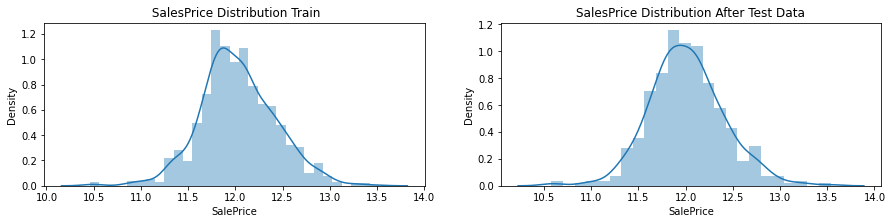

In [39]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(traindf.SalePrice)
plt.title(" SalesPrice Distribution Train")

plt.subplot(1,2,2)
sns.distplot(testdf.SalePrice)
plt.title("SalesPrice Distribution After Test Data")

plt.show()

- Now both Training and Test dataset follows the same distribution

# Scaling variables


- variables are having different range so we will perform min-max scaling(values in 0-1 range ) on this data.
- Also there are outliers in data and min_max scaling take care of outliers as it use value 1 for outliers
- we will scale numerical variables only as we already have categorical variables having value in 0&1
- We already have Numerical Column List above we will use that to scale the variables

In [40]:
print(numericalcol)

['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age_YrSold', 'Age_YearBuilt', 'Age_YearRemodAdd', 'Age_GarageYrBlt']


In [41]:
# fit_transform() on train dataset
scaler=MinMaxScaler()

traindf[numericalcol]=scaler.fit_transform(traindf[numericalcol])

In [42]:
#transform() on test dataset

testdf[numericalcol]=scaler.transform(testdf[numericalcol])

# Model Building

- We will first Use RFE to select the features and will then use GridsearchCV method
- As we have large number of variables We will first use RFE

In [43]:
y_train=traindf.pop("SalePrice")
X_train=traindf

#For test df
y_test=testdf.pop("SalePrice")
X_test=testdf

In [44]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [45]:
# Using RFE to reduce the number of features to be used for Grid search CV
rfe=RFE(lm,20)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [46]:
#Columns supported by RFE
colRFESupported = X_train.columns[rfe.support_]
colRFESupported

Index(['BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ',
       'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf',
       'BsmtQual_NA', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'GarType_NA', 'OverallQual_2', 'OverallQual_3',
       'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7',
       'OverallQual_8', 'OverallQual_9', 'OverallQual_10'],
      dtype='object')

### Filter Train and Test datset as per RFE selected above columns

In [47]:
X_train=X_train[colRFESupported]
X_test = X_test[colRFESupported]

In [48]:
X_test.shape

(436, 20)

# Ridge Regression

In [49]:
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import r2_score

In [50]:
# list of alphas to tune
params = {'alpha': [0.0001,0.0002, 0.001,0.002, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#K Folds
noOfFolds = KFold(n_splits=10,random_state=100,shuffle=True)

In [51]:
# Using Cross validation and GridSearchCV method

ridge = Ridge()

model_Ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 3, 
                        return_train_score=True,
                        verbose = 1)            
model_Ridge.fit(X_train, y_train) 

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0002, 0.001, 0.002, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                   10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
model_Ridge_result = pd.DataFrame(model_Ridge.cv_results_)
model_Ridge_result = model_Ridge_result[model_Ridge_result['param_alpha']<=200]
model_Ridge_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.008000,3.022059e-06,0.005332,0.003771,0.0001,{'alpha': 0.0001},-0.055231,-0.052217,-0.054743,-0.054064,0.001321,13,-0.050979,-0.052686,-0.051141,-0.051602,0.000769
1,0.008000,7.786718e-07,0.000000,0.000000,0.0002,{'alpha': 0.0002},-0.055231,-0.052217,-0.054742,-0.054064,0.001321,12,-0.050979,-0.052686,-0.051141,-0.051602,0.000769
2,0.005364,3.793071e-03,0.000000,0.000000,0.001,{'alpha': 0.001},-0.055231,-0.052218,-0.054741,-0.054063,0.001320,11,-0.050980,-0.052686,-0.051142,-0.051603,0.000769
3,0.005208,7.365471e-03,0.000000,0.000000,0.002,{'alpha': 0.002},-0.055231,-0.052218,-0.054740,-0.054063,0.001320,10,-0.050980,-0.052686,-0.051142,-0.051603,0.000769
4,0.013081,3.590519e-03,0.000996,0.001409,0.01,{'alpha': 0.01},-0.055232,-0.052221,-0.054730,-0.054061,0.001317,9,-0.050984,-0.052686,-0.051148,-0.051606,0.000767


#  alpha Tuning using YellowBrick

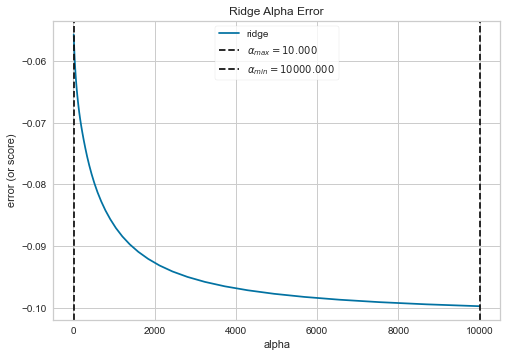

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [72]:
# Visualizing alpha with yellowbrick
from yellowbrick.regressor import ManualAlphaSelection



# Create a list of alphas to cross-validate against
alphas = np.logspace(1, 4, 50)

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alphas,
    cv=5,
    scoring= 'neg_mean_absolute_error'
)

visualizer.fit(X_train, y_train)
visualizer.show()

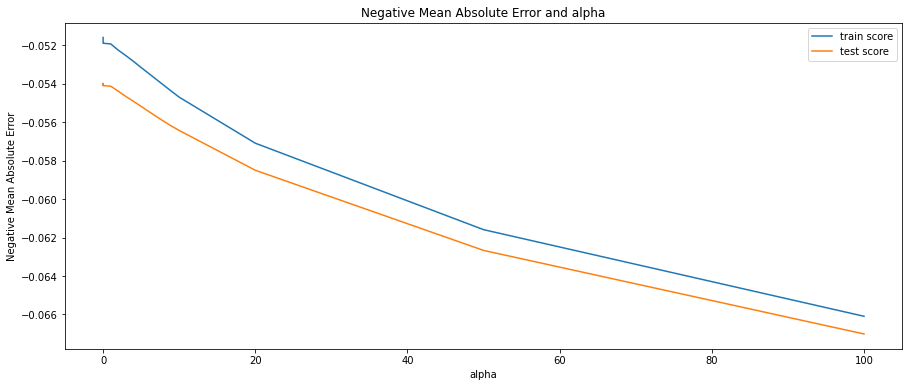

In [53]:
# plotting mean test and train scoes with alpha 
model_Ridge_result['param_alpha'] = model_Ridge_result['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(15,6))
plt.plot(model_Ridge_result['param_alpha'], model_Ridge_result['mean_train_score'])
plt.plot(model_Ridge_result['param_alpha'], model_Ridge_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
#plt.title("R2 Score and alpha")
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
#plt.ylabel('R2 Score')
plt.show()

In [54]:
# Best Value of Alpha
selected_aplha=model_Ridge.best_params_
selected_aplha

{'alpha': 0.5}

 ### Building Ridge Model again with above Optimal Value of alpha

In [55]:
aplha_val=selected_aplha["alpha"]

ridge2 = Ridge(alpha=aplha_val)

ridge2.fit(X_train, y_train)

#Predict Values
y_train_pred = ridge2.predict(X_train)
y_test_pred = ridge2.predict(X_test)


In [56]:
ridge_train_r2=r2_score(y_true=y_train,y_pred=y_train_pred)
ridge_test_r2=r2_score(y_true=y_test,y_pred=y_test_pred)

print("R2 SCORE for ridge regression on TRAIN data is : ",ridge_train_r2)
print("R2 SCORE for ridge regression on TEST data is : ",ridge_test_r2)

R2 SCORE for ridge regression on TRAIN data is :  0.7218567420746218
R2 SCORE for ridge regression on TEST data is :  0.7133824530809032


      Checking coefficients

In [57]:
len(list(ridge2.coef_))

20

In [58]:

model_param_ridge = list(ridge2.coef_)
model_param_ridge.insert(0,ridge2.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param_ridge)))
ridge_coef.columns = ['Featuere','Coef']

ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,BsmtFinType1_ALQ,0.489891
19,OverallQual_10,0.223037
18,OverallQual_9,0.138140
17,OverallQual_8,0.058436
8,GarageFinish_RFn,0.046789
9,GarageFinish_Unf,0.030934
1,BsmtFinType1_BLQ,0.018256
3,BsmtFinType1_LwQ,0.014187
2,BsmtFinType1_GLQ,0.005493
5,BsmtFinType1_Unf,0.002073


# Lasso Regression

first we will use default parameters

In [59]:
# list of alphas to tune
params = {'alpha': np.logspace(-10, 1, 400)}

In [60]:
lasso=Lasso()

model_Lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 3, 
                        return_train_score=True,
                        verbose = 1)            
model_Lasso.fit(X_train, y_train) 

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-10, 1.06553795e-10, 1.13537112e-10, 1.20978102e-10,
       1.28906759e-10, 1.37355044e-10, 1.46357012e-10, 1.55948950e-10,
       1.66169525e-10, 1.77059935e-10, 1.88664080e-10, 2.01028738e-10,
       2.14203749e-10, 2.28242224e-10, 2.43200751e-10, 2.59139630e-10,
       2.76123110e-10, 2.94219653e-10, 3.13502206e-10, 3....
       2.99357729e+00, 3.18977022e+00, 3.39882122e+00, 3.62157300e+00,
       3.85892347e+00, 4.11182940e+00, 4.38131027e+00, 4.66845237e+00,
       4.97441317e+00, 5.30042602e+00, 5.64780507e+00, 6.01795064e+00,
       6.41235480e+00, 6.83260739e+00, 7.28040247e+00, 7.75754513e+00,
       8.26595874e+00, 8.80769273e+00, 9.38493086e+00, 1.00000000e+01])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
model_Lasso_result = pd.DataFrame(model_Lasso.cv_results_)
model_Lasso_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.087644,0.006972,0.002671,0.003777,0.0,{'alpha': 1e-10},-0.055231,-0.052217,-0.054743,-0.054064,0.001321,238,-0.050979,-0.052686,-0.051141,-0.051602,0.000769
1,0.088535,0.007367,0.000000,0.000000,0.0,{'alpha': 1.0655379505623064e-10},-0.055231,-0.052217,-0.054743,-0.054064,0.001321,237,-0.050979,-0.052686,-0.051141,-0.051602,0.000769
2,0.093749,0.000004,0.000000,0.000000,0.0,{'alpha': 1.1353711240885201e-10},-0.055231,-0.052217,-0.054743,-0.054064,0.001321,236,-0.050979,-0.052686,-0.051141,-0.051602,0.000769
3,0.093561,0.000273,0.002668,0.003773,0.0,{'alpha': 1.2097810206889038e-10},-0.055231,-0.052217,-0.054743,-0.054064,0.001321,235,-0.050979,-0.052686,-0.051141,-0.051602,0.000769
4,0.094674,0.007251,0.000000,0.000000,0.0,{'alpha': 1.2890675894140244e-10},-0.055231,-0.052217,-0.054743,-0.054064,0.001321,234,-0.050979,-0.052686,-0.051141,-0.051602,0.000769


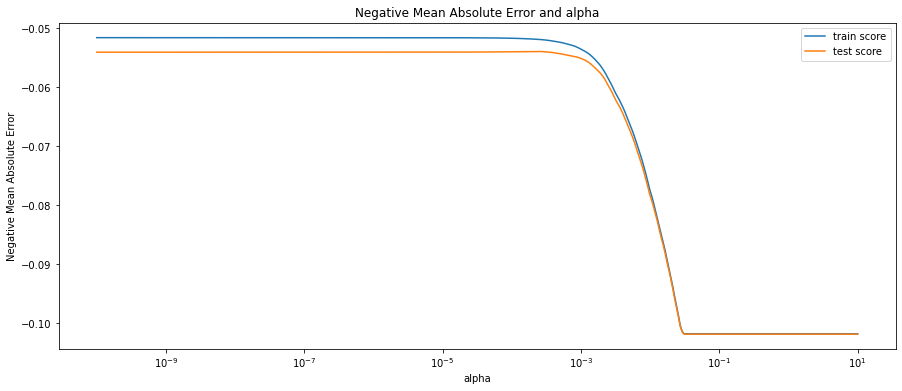

In [62]:
# plotting mean test and train scoes with alpha 
model_Lasso_result['param_alpha'] = model_Lasso_result['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(15,6))
plt.plot(model_Lasso_result['param_alpha'], model_Lasso_result['mean_train_score'])
plt.plot(model_Lasso_result['param_alpha'], model_Lasso_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")
plt.title("Negative Mean Absolute Error and alpha")
#plt.ylabel('R2 Score')
#plt.title("R2 Score and alpha")
plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [63]:
# Best Value of Alpha
alphaval=model_Lasso.best_params_
alphaval

{'alpha': 0.00024887998672586673}

# alpha tuning  for Lasso using YellowBrick

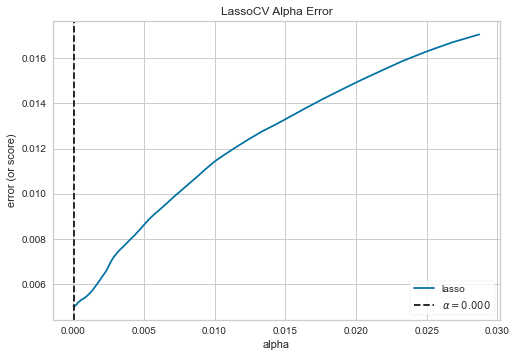

AlphaSelection(ax=<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>,
               estimator=LassoCV(random_state=0))

In [75]:
from yellowbrick.regressor.alphas import alphas
# Use the quick method and immediately show the figure
alphas(LassoCV(random_state=0), X_train, y_train)

- Using yellow brick saved our time as compare to using RegressorCV for parameter tuning.
- and we got same  optimum alpha value 

### Building Lasso  Model again with above Optimal Value of alpha

In [76]:
selected_val=alphaval["alpha"]
lasso2=Lasso(alpha=selected_val)
lasso2.fit(X_train,y_train)

#making prediction
y_train_pred=lasso2.predict(X_train)
y_test_pred= lasso2.predict(X_test)

# R2 Square

lasso_train_r2=r2_score(y_true=y_train,y_pred=y_train_pred)
lasso_test_r2=r2_score(y_true=y_test,y_pred=y_test_pred)
print("R2 SCORE for LASSO regression on TRAIN data is : ",lasso_train_r2)
print("R2 SCORE for LASSO regression on TEST data is : ",lasso_test_r2)

R2 SCORE for LASSO regression on TRAIN data is :  0.7197818496877746
R2 SCORE for LASSO regression on TEST data is :  0.7138858866408685


<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

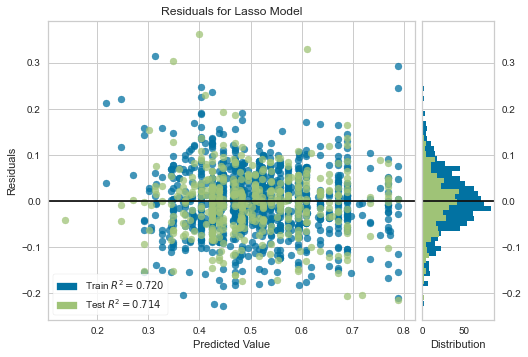

In [77]:
visualizer = ResidualsPlot(lasso2)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
visualizer.show("Residual_lasso.jpg") 


# lets visualize prediction error on our final model using Yellowbrick

In [79]:
help(PredictionError)

Help on class PredictionError in module yellowbrick.regressor.prediction_error:

class PredictionError(yellowbrick.regressor.base.RegressionScoreVisualizer)
 |  PredictionError(estimator, ax=None, shared_limits=True, bestfit=True, identity=True, alpha=0.75, is_fitted='auto', **kwargs)
 |  
 |  The prediction error visualizer plots the actual targets from the dataset
 |  against the predicted values generated by our model(s). This visualizer is
 |  used to detect noise or heteroscedasticity along a range of the target
 |  domain.
 |  
 |  Parameters
 |  ----------
 |  
 |  estimator : a Scikit-Learn regressor
 |      Should be an instance of a regressor, otherwise will raise a
 |      YellowbrickTypeError exception on instantiation.
 |      If the estimator is not fitted, it is fit when the visualizer is fitted,
 |      unless otherwise specified by ``is_fitted``.
 |  
 |  ax : matplotlib Axes, default: None
 |      The axes to plot the figure on. If None is passed in the current axes
 

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

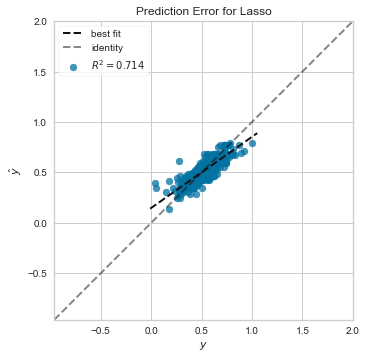

In [84]:
# Instantiate the linear model and visualizer
visualizer = PredictionError(lasso2)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
visualizer.show("prediction_error.jpg")  

<AxesSubplot:title={'center':'Feature Importances of 20 Features using Lasso'}, xlabel='coefficient value'>

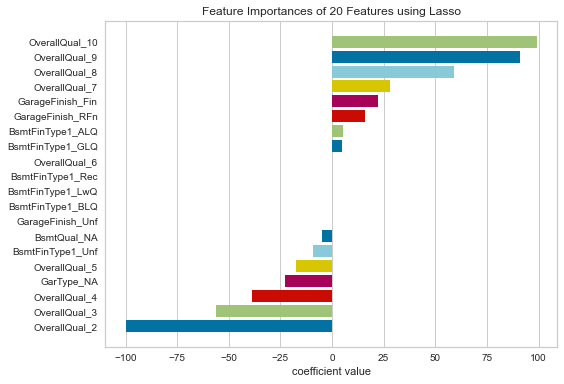

In [95]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(lasso2,relative=False)
viz.fit(X_train, y_train)
viz.show("feature_importance.jpg")

### Checking feature selected by Lasso

Lasso makes feature coefficients value zero and does also reduces the number of selected feature

In [88]:
model_param_lasso = list(lasso2.coef_)
model_param_lasso.insert(0,lasso2.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param_lasso)))
lasso_coef.columns = ['Featuere','Coef']

#sorting values
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,BsmtFinType1_ALQ,0.469543
19,OverallQual_10,0.230213
18,OverallQual_9,0.149042
17,OverallQual_8,0.070363
8,GarageFinish_RFn,0.056641
9,GarageFinish_Unf,0.040069
1,BsmtFinType1_BLQ,0.013863
3,BsmtFinType1_LwQ,0.012644
2,BsmtFinType1_GLQ,0.000000
16,OverallQual_7,0.000000


<b>CONCLUSION:</b>

-  For Ridge Rgression -
                Optimal value of alpha is :0.2 and R2 Score on Train data is :0.892  and  Test data is :0.862
-  For Lasso Rgression -
                Optimal value of alpha is :0.0001  and R2 Score onTrain data is :0.886 and Test data is :0.879

-  We have got <b>approximately same R2 Score</b> using Ridge and Lasso regression on Test data
                But Lasso also reduces number of features by bringing its coefficients to zero
                
-  We have <b>less no of features in Lasso model</b> as it penalizes model by brininging coeffucient to 0
                 So we will use LASSO MODEL as our FINAL MODEL
                 
-  Below are some Best variables which explains the House price in a best way:
                   1.]BsmtFullBath, 2.]BsmtFinType1, 3.]WoodDeckSF, 4.]MSZoning, 5.]BsmtFinSF1
                 6.]OverallQual, 7.]LandContour, 8.]RoofStyle

## Visualization on final Model without using yellowbrick

- We have visualized model predictions with few line of code above
- Lets do the same without using Yellowbrick and see what all the things we need to do 

 ### RESIDUAL ANALYSIS ON FINAL MODEL

    We will check for the below assumptions made while building linear model-
    - error terms are normally distributed with mean 0
    - errors are independant i.e no pattern wrt x or y
    - error terms have constant variance
    

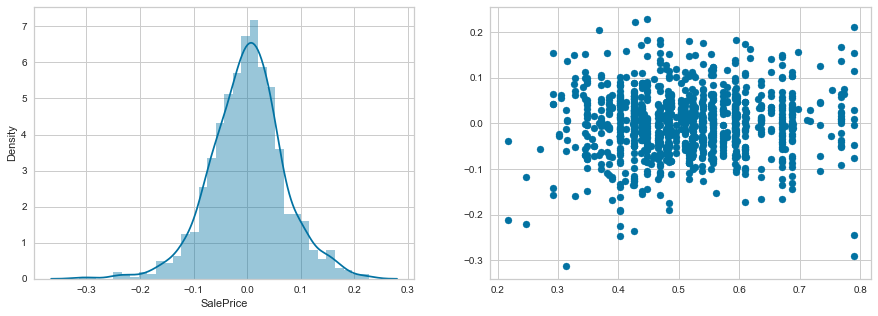

In [87]:
plt.figure(figsize=(15,5))
residuals= y_train-y_train_pred
plt.subplot(1,2,1)
sns.distplot(residuals)
plt.subplot(1,2,2)
plt.scatter(y_train_pred ,residuals)
plt.show()


Text(0.5, 0, 'Index')

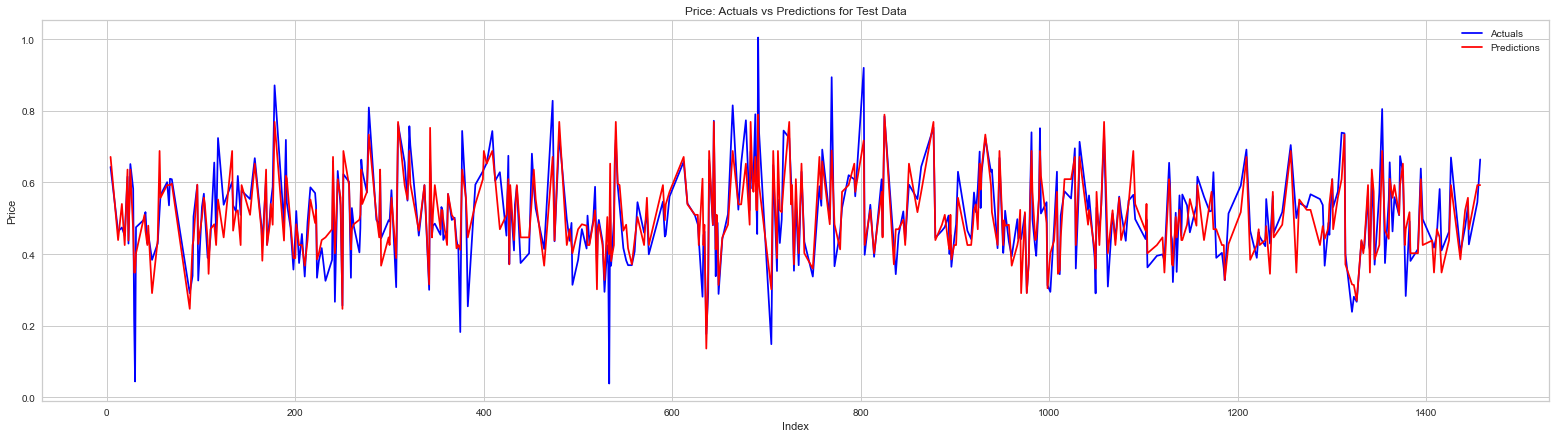

In [86]:
#actual vs predicted price on TEST DATA
fig, ax=plt.subplots(figsize=(27,7))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=y_test_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions for Test Data')
ax.set_ylabel('Price')
ax.set_xlabel('Index')